<h1 style='text-align: center; color: #FA5E3C; background: white; padding: 20px; border: 5px solid #FA5E3C; font-weight: bold' >
    Analysis Life Expectancy in Diverse Countries Using Multivariate Linear Regression
</h1>


<br>
<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="flex: 0;">
        <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/05/14827regre1.png" alt="Image" style="max-width: 135px;" />
    </div>
    <div style="flex: 1; margin-left: 30px;">
        <p style="font-weight: bold; color: white;">Getting started with Multivariate Linear Regression Analysis</p>
        <p>Regresi Linear Multivariate atau Regresi Linear Berganda adalah metode statistik yang digunakan untuk menganalisis hubungan antara dua atau lebih variabel bebas (independen) dan satu variabel terikat (dependen) <b><mark style="background-color:#526D82;color:white;border-radius:5px;opacity:1.0">Sales dataset</mark></b>. Tujuan dari metode ini adalah untuk memahami bagaimana nilai dari variabel terikat berubah saat terdapat perubahan pada variabel bebas2. Misalnya, bagaimana tingkat curah hujan, suhu, dan jumlah pupuk yang ditambahkan memengaruhi pertumbuhan tanaman <b><span style='color:#9DB2BF'>univariate</span></b> and <b><span style='color:#9DB2BF'>bivariate analysis</span></b>, as well as time series methods like <b><span style='color:#9DB2BF'>rolling window analysis</span></b> , we aim to uncover valuable insights into the complex relationships within the data.
        </p>
        <p style="border: 1px solid black; padding: 10px;">Dalam konteks ini, variabel bebas adalah faktor-faktor yang mempengaruhi hasil (variabel terikat), dan kita mencoba untuk memodelkan hubungan antara variabel-variabel ini. Jika ada dua atau lebih variabel bebas yang berkorelasi tinggi, maka hanya salah satu dari mereka yang sebaiknya digunakan dalam model regresi.
        </p>
        <p style="font-style: italic;">Let's explore and then make results and discussion to gain deeper insights from our analysis. 🧐🔍
        </p>
    </div>
</div>

<br>

## <a id='toc1_1_'></a>[<b><span style='color:#FF8551'>|</span> Rumus multivariate linear regression</b>](#toc0_)

Rumus untuk regresi linier berganda adalah:


${y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n$


Dengan keterangan:


<b><mark style="background-color:#526D82;color:white;border-radius:5px;opacity:1.0"> Y </mark></b> : Variabel terikat(Dependen)

<b><mark style="background-color:#526D82;color:white;border-radius:5px;opacity:1.0"> X </mark></b>: Variabel tidak terikat (Independen)

<b><mark style="background-color:#526D82;color:white;border-radius:5px;opacity:1.0"> β0 (beta)</mark></b>: Konstanta, perpot9ongan garis regresi dengan sumbu Y (nilai estimasi jika x=0)

<b><mark style="background-color:#526D82;color:white;border-radius:5px;opacity:1.0"> β1 (beta)</mark></b>: Koefisien regresi (kemiringan); besaran Response yang ditimbulkan oleh variabel.

<b><mark style="background-color:#526D82;color:white;border-radius:5px;opacity:1.0"> n </mark></b>: Banyaknya data yang dihitung


# <a id='toc2_'></a>[<b><span style='color:#FF8551'>|</span> SDGs</b>](#toc0_)

<b><mark style="background-color:#526D82;color:white;border-radius:5px;opacity:1.0">Indicator 3.8.1</mark></b> : Mortality rate attributed to household and ambient air pollution

<b><mark style="background-color:#526D82;color:white;border-radius:5px;opacity:1.0">Target 3.8</mark></b>: By 2030, substantially reduce the number of deaths and illnesses from hazardous chemicals and air, water and soil pollution and contamination

<b><mark style="background-color:#526D82;color:white;border-radius:5px;opacity:1.0">Goal 3</mark></b>: Ensure healthy lives and promote well-being for all at all ages

**Table of contents**<a id='toc0_'></a>    
- [<b>I <span style='color:#FF8551'>|</span> Data Preparation</b>](#toc3_)    
- [<b>II <span style='color:#FF8551'>|</span> Data Preprocssing</b>](#toc4_)    
- [<b>III <span style='color:#FF8551'>|</span> Data Visualization</b>](#toc5_)    
- [<b>IV <span style='color:#FF8551'>|</span> Multivariate Linear Regression</b>](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc3_'></a>[<b>I <span style='color:#FF8551'>|</span> Data Preparation</b>](#toc0_)

In [39]:
#import library

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#Membuka dataset

df = pd.read_excel('D:\Jupyter lab\P_Data_Extract_From_World_Development_Indicators.xlsx')
df

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019]
0,Afghanistan,AFG,Current health expenditure per capita (current US$),SH.XPD.CHEX.PC.CD,74.234104
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,500.522981
2,Afghanistan,AFG,Number of maternal deaths,SH.MMR.DTHS,8900
3,Afghanistan,AFG,Number of infant deaths,SH.DTH.IMRT,62760
4,Afghanistan,AFG,"Primary education, duration (years)",SE.PRM.DURS,6
...,...,...,...,...,...
2170,NaN,NaN,NaN,NaN,NaN
2171,NaN,NaN,NaN,NaN,NaN
2172,NaN,NaN,NaN,NaN,NaN
2173,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


<div style="border-radius: 10px; border: #FF8551 solid; padding: 15px; background-color: #FF855140; font-size: 100%; text-align: left; margin-top: 10px;">
    <b>📔 Dataset information :</b> Di atas merupakan dataset yang diambil  langsung dari website world bank di database world development indicator. Dari dataset tersebut kemudian kita jabarkan detailnya yang kemudian menyimpulkan apa saja yang akan kita tangani terhadap dataset itu, lalu kita jabarkan tahap tahapannya
    <ul>
        <li><b>Raw data</b> - data yang diekstrak dari website data world bank masih perlu data mentah dan harus diproses supaya dapat dianalisa</li>
        <li><b>Structure data</b> - Data disini hanya terdapat satu variabel yaitu Series Name dengan beberapa variabel yang menjadi satu kolom, lalu solusinya kita akan melakukan pivot supaya kolom variabel x dan y dapat berupa beberapa kolom yang kemudian nanti kita terapkan regresi</li>
        <li><b>Missing value</b> - Disini terdapat beberapa data yang kosong, jadi disini kita perlu menghapus data supaya tidak mengganggu proses model</li>
        <li><b>Data cleaning</b> - Proses merapikan data supaya mudah dibaca</li>
    </ul>
    Setelah proses datasetnya selesai, kemudian kita melakukan eksplorasi data supaya kita benar benar memahami data kita sebelum menerapkan linear regression.
</div>

# <a id='toc4_'></a>[<b>II <span style='color:#FF8551'>|</span> Data Preprocssing</b>](#toc0_)

In [41]:
df = df.drop(['Country Code', 'Series Code'], axis=1)
df.tail(10)

,Country Name,Series Name,2019 [YR2019]
2165,Zimbabwe,CO2 emissions (metric tons per capita),0.663338
2166,Zimbabwe,"Immunization, measles (% of children ages 12-23 months)",85
2167,Zimbabwe,"Immunization, HepB3 (% of one-year-old children)",90
2168,Zimbabwe,"Immunization, DPT (% of children ages 12-23 months)",90
2169,Zimbabwe,"Life expectancy at birth, total (years)",61.292
2170,NaN,NaN,NaN
2171,NaN,NaN,NaN
2172,NaN,NaN,NaN
2173,Data from database: World Development Indicators,NaN,NaN
2174,Last Updated: 10/26/2023,NaN,NaN


In [42]:
df = df.iloc[:-5]
df.tail(10)

,Country Name,Series Name,2019 [YR2019]
2160,Zimbabwe,Current health expenditure per capita (current US$),54.808506
2161,Zimbabwe,GDP per capita (current US$),1421.868596
2162,Zimbabwe,Number of maternal deaths,1900
2163,Zimbabwe,Number of infant deaths,17852
2164,Zimbabwe,"Primary education, duration (years)",7
2165,Zimbabwe,CO2 emissions (metric tons per capita),0.663338
2166,Zimbabwe,"Immunization, measles (% of children ages 12-23 months)",85
2167,Zimbabwe,"Immunization, HepB3 (% of one-year-old children)",90
2168,Zimbabwe,"Immunization, DPT (% of children ages 12-23 months)",90
2169,Zimbabwe,"Life expectancy at birth, total (years)",61.292


In [43]:
data = df.pivot(index='Country Name', columns='Series Name', values='2019 [YR2019]')
data.reset_index(inplace=True)
data.head()

Series Name,Country Name,CO2 emissions (metric tons per capita),Current health expenditure per capita (current US$),GDP per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)",Number of infant deaths,Number of maternal deaths,"Primary education, duration (years)"
0,Afghanistan,0.297564,74.234104,500.522981,72,72,64,63.565,62760,8900,6
1,Albania,1.749462,..,5396.214227,99,99,95,79.282,250,2,5
2,Algeria,3.994402,250.560776,4021.983608,91,91,80,76.474,20101,760,5
3,American Samoa,..,..,13672.576657,..,..,..,..,..,..,6
4,Andorra,6.287204,3061.790527,41328.600499,99,98,99,..,2,..,6


In [44]:
column = ['country', 'CO2 Emission', 'health expenditure', 'GDP', 'Immunization DPT', 'Immunization HepB3', 'Immunization measles', 'Life expectancy', 'Infant death', 'maternal death', 'Primary education',]
data.columns = column
data.head(15)

,country,CO2 Emission,health expenditure,GDP,Immunization DPT,Immunization HepB3,Immunization measles,Life expectancy,Infant death,maternal death,Primary education
0,Afghanistan,0.297564,74.234104,500.522981,72,72,64,63.565,62760,8900,6
1,Albania,1.749462,..,5396.214227,99,99,95,79.282,250,2,5
2,Algeria,3.994402,250.560776,4021.983608,91,91,80,76.474,20101,760,5
3,American Samoa,..,..,13672.576657,..,..,..,..,..,..,6
4,Andorra,6.287204,3061.790527,41328.600499,99,98,99,..,2,..,6
...,...,...,...,...,...,...,...,...,...,...,...
10,Australia,15.595727,5555.374023,54941.06572,95,95,94,82.9,995,16,7
11,Austria,7.263331,5262.054199,50070.403348,85,85,95,81.895122,249,5,4
12,Azerbaijan,3.543495,191.755524,4805.753718,94,94,98,73.102,2634,39,4
13,"Bahamas, The",6.482894,1921.127075,32279.011363,89,89,83,71.205,71,4,6


In [45]:
data.shape

(217, 11)

In [46]:
data["country"] = data["country"].str.replace(',', '')
data = data.replace(["..", "...",], np.nan)
data.dropna(inplace=True)
data.head(10)

,country,CO2 Emission,health expenditure,GDP,Immunization DPT,Immunization HepB3,Immunization measles,Life expectancy,Infant death,maternal death,Primary education
0,Afghanistan,0.297564,74.234104,500.522981,72.0,72.0,64.0,63.565000,62760.0,8900.0,6.0
2,Algeria,3.994402,250.560776,4021.983608,91.0,91.0,80.0,76.474000,20101.0,760.0,5.0
5,Angola,0.753638,69.379341,2142.238757,57.0,53.0,51.0,62.448000,63492.0,2900.0,6.0
6,Antigua and Barbuda,5.525582,801.543823,18187.779712,95.0,99.0,93.0,78.691000,6.0,0.0,7.0
7,Argentina,3.742030,958.523499,9963.674231,83.0,83.0,86.0,77.284000,5086.0,220.0,6.0
8,Armenia,2.196552,549.474365,4828.504889,92.0,92.0,95.0,75.439000,391.0,9.0,4.0
10,Australia,15.595727,5555.374023,54941.065720,95.0,95.0,94.0,82.900000,995.0,16.0,7.0
11,Austria,7.263331,5262.054199,50070.403348,85.0,85.0,95.0,81.895122,249.0,5.0,4.0
12,Azerbaijan,3.543495,191.755524,4805.753718,94.0,94.0,98.0,73.102000,2634.0,39.0,4.0
13,Bahamas The,6.482894,1921.127075,32279.011363,89.0,89.0,83.0,71.205000,71.0,4.0,6.0


In [47]:
data.shape

(168, 11)

In [48]:
data

,country,CO2 Emission,health expenditure,GDP,Immunization DPT,Immunization HepB3,Immunization measles,Life expectancy,Infant death,maternal death,Primary education
0,Afghanistan,0.297564,74.234104,500.522981,72.0,72.0,64.0,63.565,62760.0,8900.0,6.0
2,Algeria,3.994402,250.560776,4021.983608,91.0,91.0,80.0,76.474,20101.0,760.0,5.0
5,Angola,0.753638,69.379341,2142.238757,57.0,53.0,51.0,62.448,63492.0,2900.0,6.0
6,Antigua and Barbuda,5.525582,801.543823,18187.779712,95.0,99.0,93.0,78.691,6.0,0.0,7.0
7,Argentina,3.742030,958.523499,9963.674231,83.0,83.0,86.0,77.284,5086.0,220.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
208,Uzbekistan,3.504663,98.587418,1795.201768,96.0,96.0,98.0,71.344,10886.0,240.0,4.0
209,Vanuatu,0.548285,101.974411,3076.589886,90.0,90.0,80.0,69.877,192.0,8.0,6.0
211,Viet Nam,3.567848,173.650452,3491.091279,89.0,89.0,95.0,74.093,25197.0,2000.0,5.0
215,Zambia,0.414336,67.457771,1268.120941,88.0,88.0,93.0,62.793,27246.0,840.0,7.0


In [49]:
data.reset_index(inplace=True, drop=True)
data

,country,CO2 Emission,health expenditure,GDP,Immunization DPT,Immunization HepB3,Immunization measles,Life expectancy,Infant death,maternal death,Primary education
0,Afghanistan,0.297564,74.234104,500.522981,72.0,72.0,64.0,63.565,62760.0,8900.0,6.0
1,Algeria,3.994402,250.560776,4021.983608,91.0,91.0,80.0,76.474,20101.0,760.0,5.0
2,Angola,0.753638,69.379341,2142.238757,57.0,53.0,51.0,62.448,63492.0,2900.0,6.0
3,Antigua and Barbuda,5.525582,801.543823,18187.779712,95.0,99.0,93.0,78.691,6.0,0.0,7.0
4,Argentina,3.742030,958.523499,9963.674231,83.0,83.0,86.0,77.284,5086.0,220.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
163,Uzbekistan,3.504663,98.587418,1795.201768,96.0,96.0,98.0,71.344,10886.0,240.0,4.0
164,Vanuatu,0.548285,101.974411,3076.589886,90.0,90.0,80.0,69.877,192.0,8.0,6.0
165,Viet Nam,3.567848,173.650452,3491.091279,89.0,89.0,95.0,74.093,25197.0,2000.0,5.0
166,Zambia,0.414336,67.457771,1268.120941,88.0,88.0,93.0,62.793,27246.0,840.0,7.0


__Dataset Descriptions:__

Dari kolom yang Anda berikan, sepertinya Anda memiliki data yang mencakup berbagai aspek kesehatan dan ekonomi suatu negara atau wilayah. Berikut adalah detail untuk setiap kolom:

__CO2 Emissions (metric tons per capita):__
Ini mengukur jumlah emisi karbon dioksida (CO2) per kapita, yang merupakan indikator umum dari tingkat polusi dan dampak lingkungan suatu negara.

__Current Health Expenditure per Capita (current US$):__
Ini mencerminkan total pengeluaran kesehatan yang dilakukan per individu dalam mata uang dolar AS saat ini. Ini dapat memberikan gambaran tentang seberapa banyak suatu negara mengalokasikan sumber daya untuk sistem kesehatannya.

__GDP per Capita (current US$):__
GDP per kapita mengukur nilai total barang dan jasa yang dihasilkan oleh suatu negara dibagi dengan jumlah penduduknya. Ini memberikan indikasi tentang tingkat kemakmuran ekonomi per individu.

__Immunization, DPT (% of children ages 12-23 months):__
Ini menunjukkan persentase anak-anak berusia 12-23 bulan yang telah diimunisasi terhadap penyakit difteri, pertussis, dan tetanus (DPT). Ini adalah indikator keberhasilan program imunisasi pada anak-anak.

__Immunization, HepB3 (% of one-year-old children):__
Ini menunjukkan persentase anak-anak berusia satu tahun yang telah diimunisasi terhadap hepatitis B. Ini adalah bagian dari upaya untuk memberikan perlindungan terhadap penyakit menular.

__Immunization, Measles (% of children ages 12-23 months):__
Ini menunjukkan persentase anak-anak berusia 12-23 bulan yang telah diimunisasi terhadap penyakit campak. Imunisasi campak juga merupakan bagian dari upaya kesehatan masyarakat.

__Life Expectancy at Birth, Total (years):__
Ini adalah perkiraan rata-rata berapa lama seseorang diharapkan hidup pada saat lahir. Ini memberikan gambaran umum tentang kesehatan dan harapan hidup penduduk.

__Number of Infant Deaths:__
Ini adalah jumlah kematian bayi dalam suatu periode waktu tertentu. Ini mencerminkan tingkat kesehatan neonatal dan perawatan kesehatan ibu dan anak.

__Number of Maternal Deaths:__
Ini adalah jumlah kematian ibu yang terjadi selama kehamilan, persalinan, atau dalam 42 hari setelah persalinan. Ini mencerminkan tingkat keamanan dan kualitas perawatan maternal.

__Primary Education, Duration (years):__
Ini mencerminkan durasi atau lama pendidikan dasar di suatu negara atau wilayah. Durasi pendidikan dasar dapat menjadi indikator tingkat pendidikan masyarakat.

In [50]:
data.describe()

,CO2 Emission,health expenditure,GDP,Immunization DPT,Immunization HepB3,Immunization measles,Life expectancy,Infant death,maternal death,Primary education
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,4.037317,1050.082583,13468.437281,88.714286,88.071429,87.482143,72.243952,22817.226190,1691.535714,5.744048
std,4.807261,1808.272865,19065.871465,12.074193,12.499855,13.777085,7.432767,75888.290081,7276.100088,0.833412
min,0.033715,16.589853,216.972971,35.000000,35.000000,33.000000,52.910000,6.000000,0.000000,4.000000
25%,0.764841,73.616889,1986.323714,85.000000,85.000000,83.000000,66.561500,272.750000,6.000000,5.000000
50%,2.472565,317.123550,5717.004608,93.000000,92.000000,93.000000,73.154500,2054.500000,58.000000,6.000000
75%,5.543007,1013.335587,15893.218123,97.000000,97.000000,97.000000,77.815500,16173.000000,875.000000,6.000000
max,31.877203,10661.028320,112621.821337,99.000000,99.000000,99.000000,84.356341,672075.000000,86000.000000,8.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               168 non-null    object 
 1   CO2 Emission          168 non-null    float64
 2   health expenditure    168 non-null    float64
 3   GDP                   168 non-null    float64
 4   Immunization DPT      168 non-null    float64
 5   Immunization HepB3    168 non-null    float64
 6   Immunization measles  168 non-null    float64
 7   Life expectancy       168 non-null    float64
 8   Infant death          168 non-null    float64
 9   maternal death        168 non-null    float64
 10  Primary education     168 non-null    float64
dtypes: float64(10), object(1)
memory usage: 14.6+ KB


In [52]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    print('Total number of outliers are', df1.shape[0] + df2.shape[0], '\n')
    f = df.loc[(df[column] > lower) & (df[column] < upper)]
    return df

out_iqr(data, "Life expectancy")

The IQR is 11.254000000000005
The lower bound value is 49.68049999999999
The upper bound value is 94.69650000000001
Total number of outliers are 0 



,country,CO2 Emission,health expenditure,GDP,Immunization DPT,Immunization HepB3,Immunization measles,Life expectancy,Infant death,maternal death,Primary education
0,Afghanistan,0.297564,74.234104,500.522981,72.0,72.0,64.0,63.565,62760.0,8900.0,6.0
1,Algeria,3.994402,250.560776,4021.983608,91.0,91.0,80.0,76.474,20101.0,760.0,5.0
2,Angola,0.753638,69.379341,2142.238757,57.0,53.0,51.0,62.448,63492.0,2900.0,6.0
3,Antigua and Barbuda,5.525582,801.543823,18187.779712,95.0,99.0,93.0,78.691,6.0,0.0,7.0
4,Argentina,3.742030,958.523499,9963.674231,83.0,83.0,86.0,77.284,5086.0,220.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
163,Uzbekistan,3.504663,98.587418,1795.201768,96.0,96.0,98.0,71.344,10886.0,240.0,4.0
164,Vanuatu,0.548285,101.974411,3076.589886,90.0,90.0,80.0,69.877,192.0,8.0,6.0
165,Viet Nam,3.567848,173.650452,3491.091279,89.0,89.0,95.0,74.093,25197.0,2000.0,5.0
166,Zambia,0.414336,67.457771,1268.120941,88.0,88.0,93.0,62.793,27246.0,840.0,7.0


# <a id='toc5_'></a>[<b>III <span style='color:#FF8551'>|</span> Data Visualization</b>](#toc0_)

In [53]:
cols = data.select_dtypes(exclude=['object'])

<AxesSubplot: >

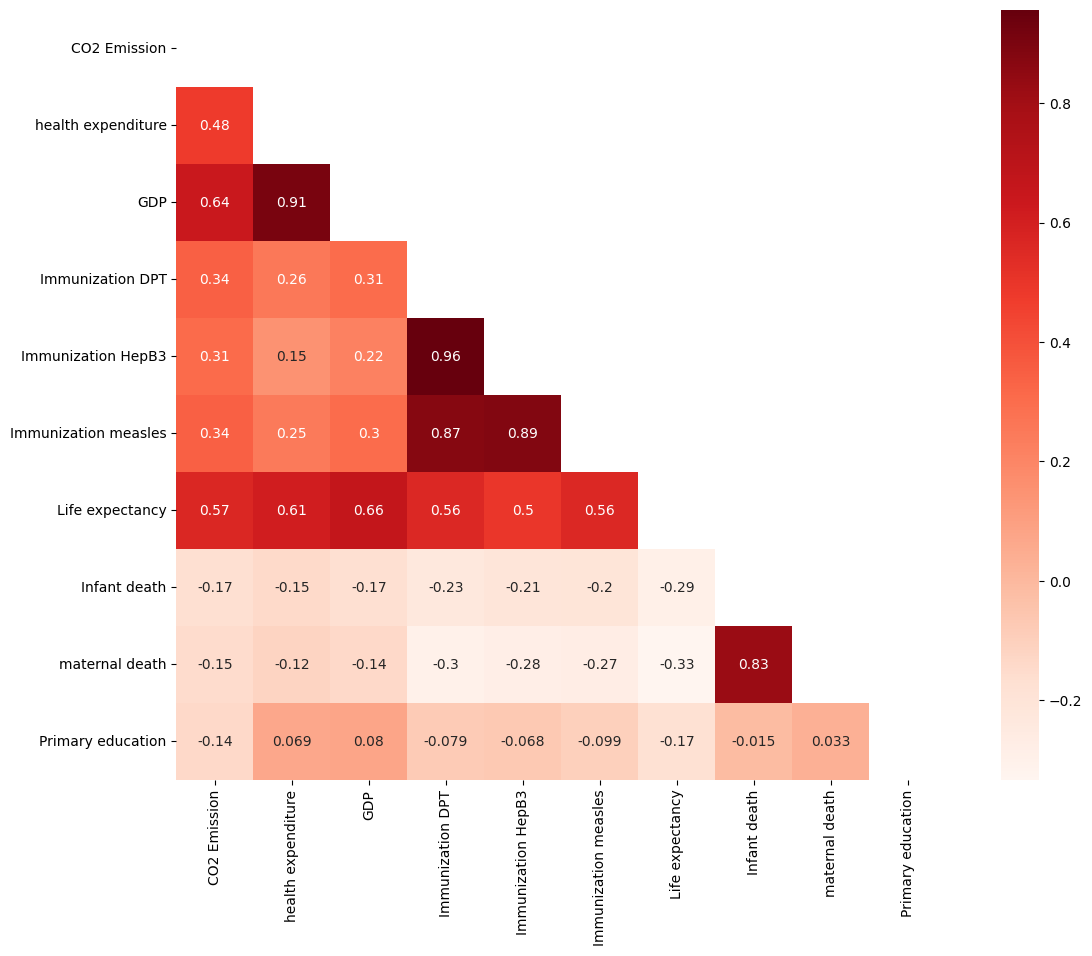

In [54]:
cols = data.select_dtypes(exclude=['object'])
def correlation_matrix(dataframe, x, y):
    corr = dataframe.corr()
    f, ax = plt.subplots(figsize=(x, y))
    mask = np.triu(np.ones_like(corr))
    sns.heatmap(corr, annot=True, mask = mask, cmap="Reds",square=True)
    return ax

correlation_matrix(cols, 14, 10)

In [55]:
import plotly.express as px
fig=px.histogram(data,x='Life expectancy')
fig.show()

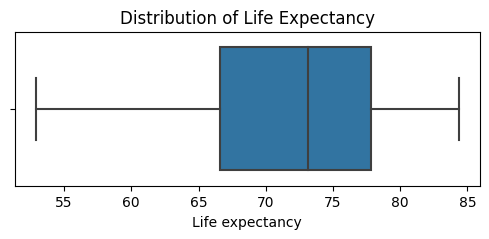

In [56]:
plt.figure(figsize=(6,2))
sns.boxplot(x=data["Life expectancy"])
plt.title('Distribution of Life Expectancy')
plt.show()

array([[<AxesSubplot: title={'center': 'CO2 Emission'}>,
        <AxesSubplot: title={'center': 'health expenditure'}>,
        <AxesSubplot: title={'center': 'GDP'}>],
       [<AxesSubplot: title={'center': 'Immunization DPT'}>,
        <AxesSubplot: title={'center': 'Immunization HepB3'}>,
        <AxesSubplot: title={'center': 'Immunization measles'}>],
       [<AxesSubplot: title={'center': 'Life expectancy'}>,
        <AxesSubplot: title={'center': 'Infant death'}>,
        <AxesSubplot: title={'center': 'maternal death'}>],
       [<AxesSubplot: title={'center': 'Primary education'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

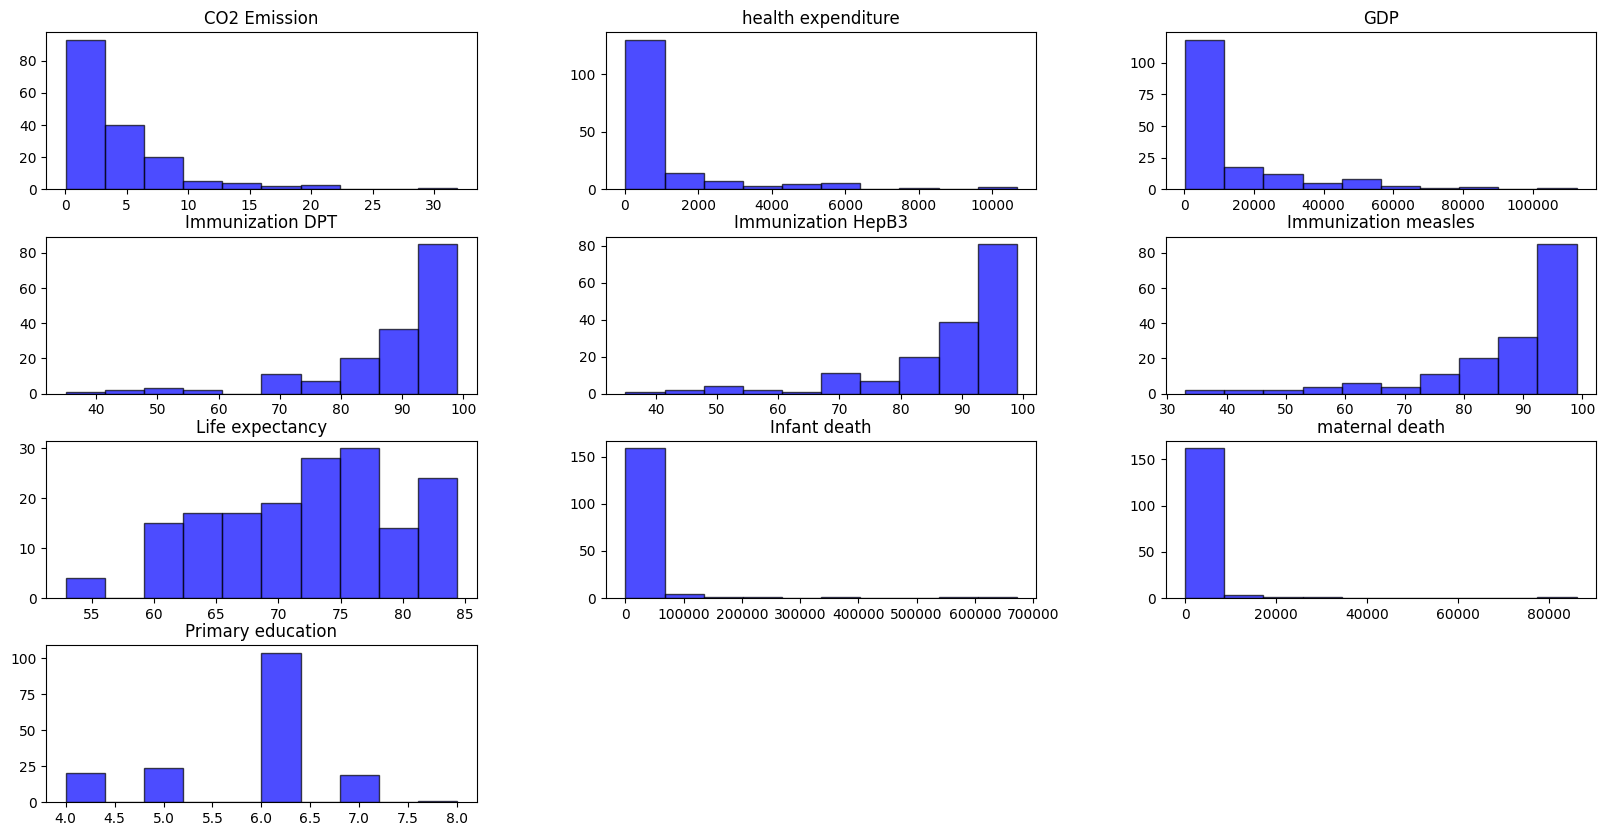

In [57]:
cols.hist(figsize=(20,10), alpha= 0.7, color = 'blue', edgecolor = 'black', grid=False)

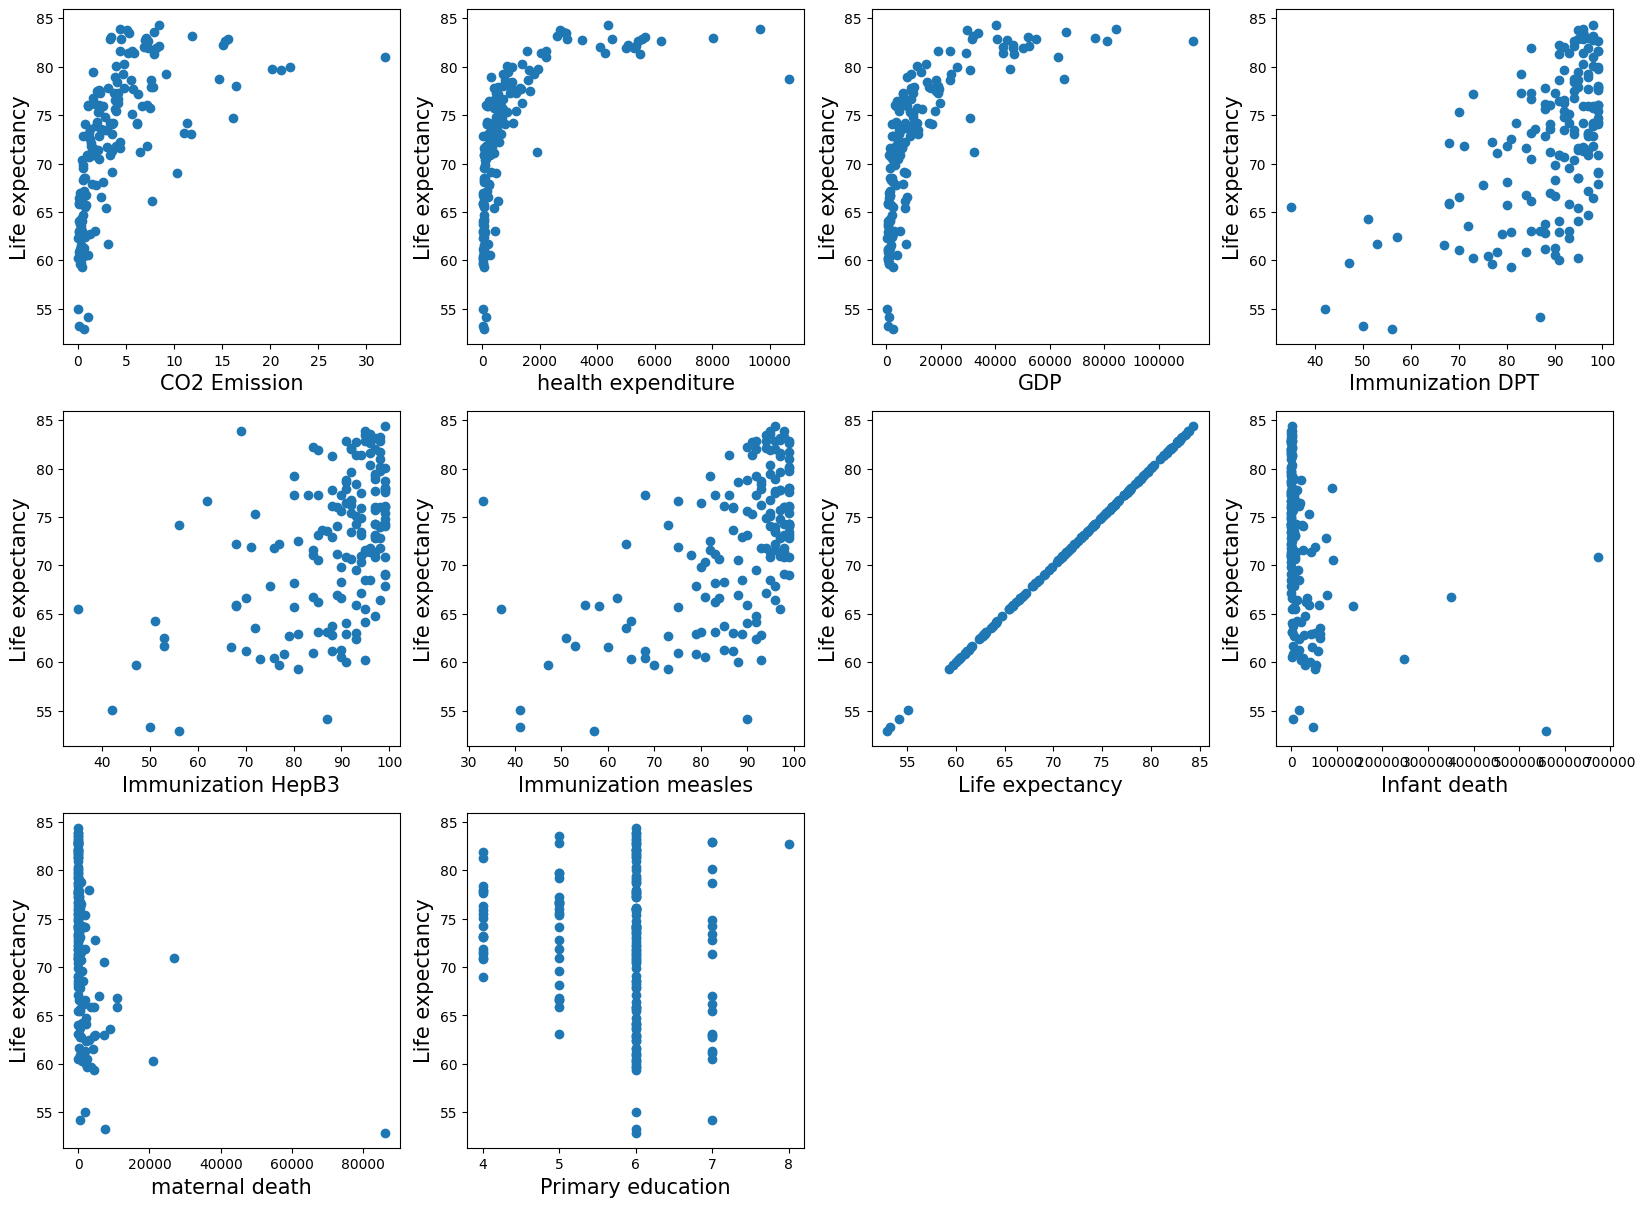

In [58]:
plt.figure(figsize=(20,20),dpi=100)

for index, feature_name in enumerate(cols):
    plt.subplot(4,4,index+1)
    plt.scatter(cols[feature_name],data['Life expectancy'])
    plt.ylabel('Life expectancy',size=15)
    plt.xlabel(feature_name,size=15)

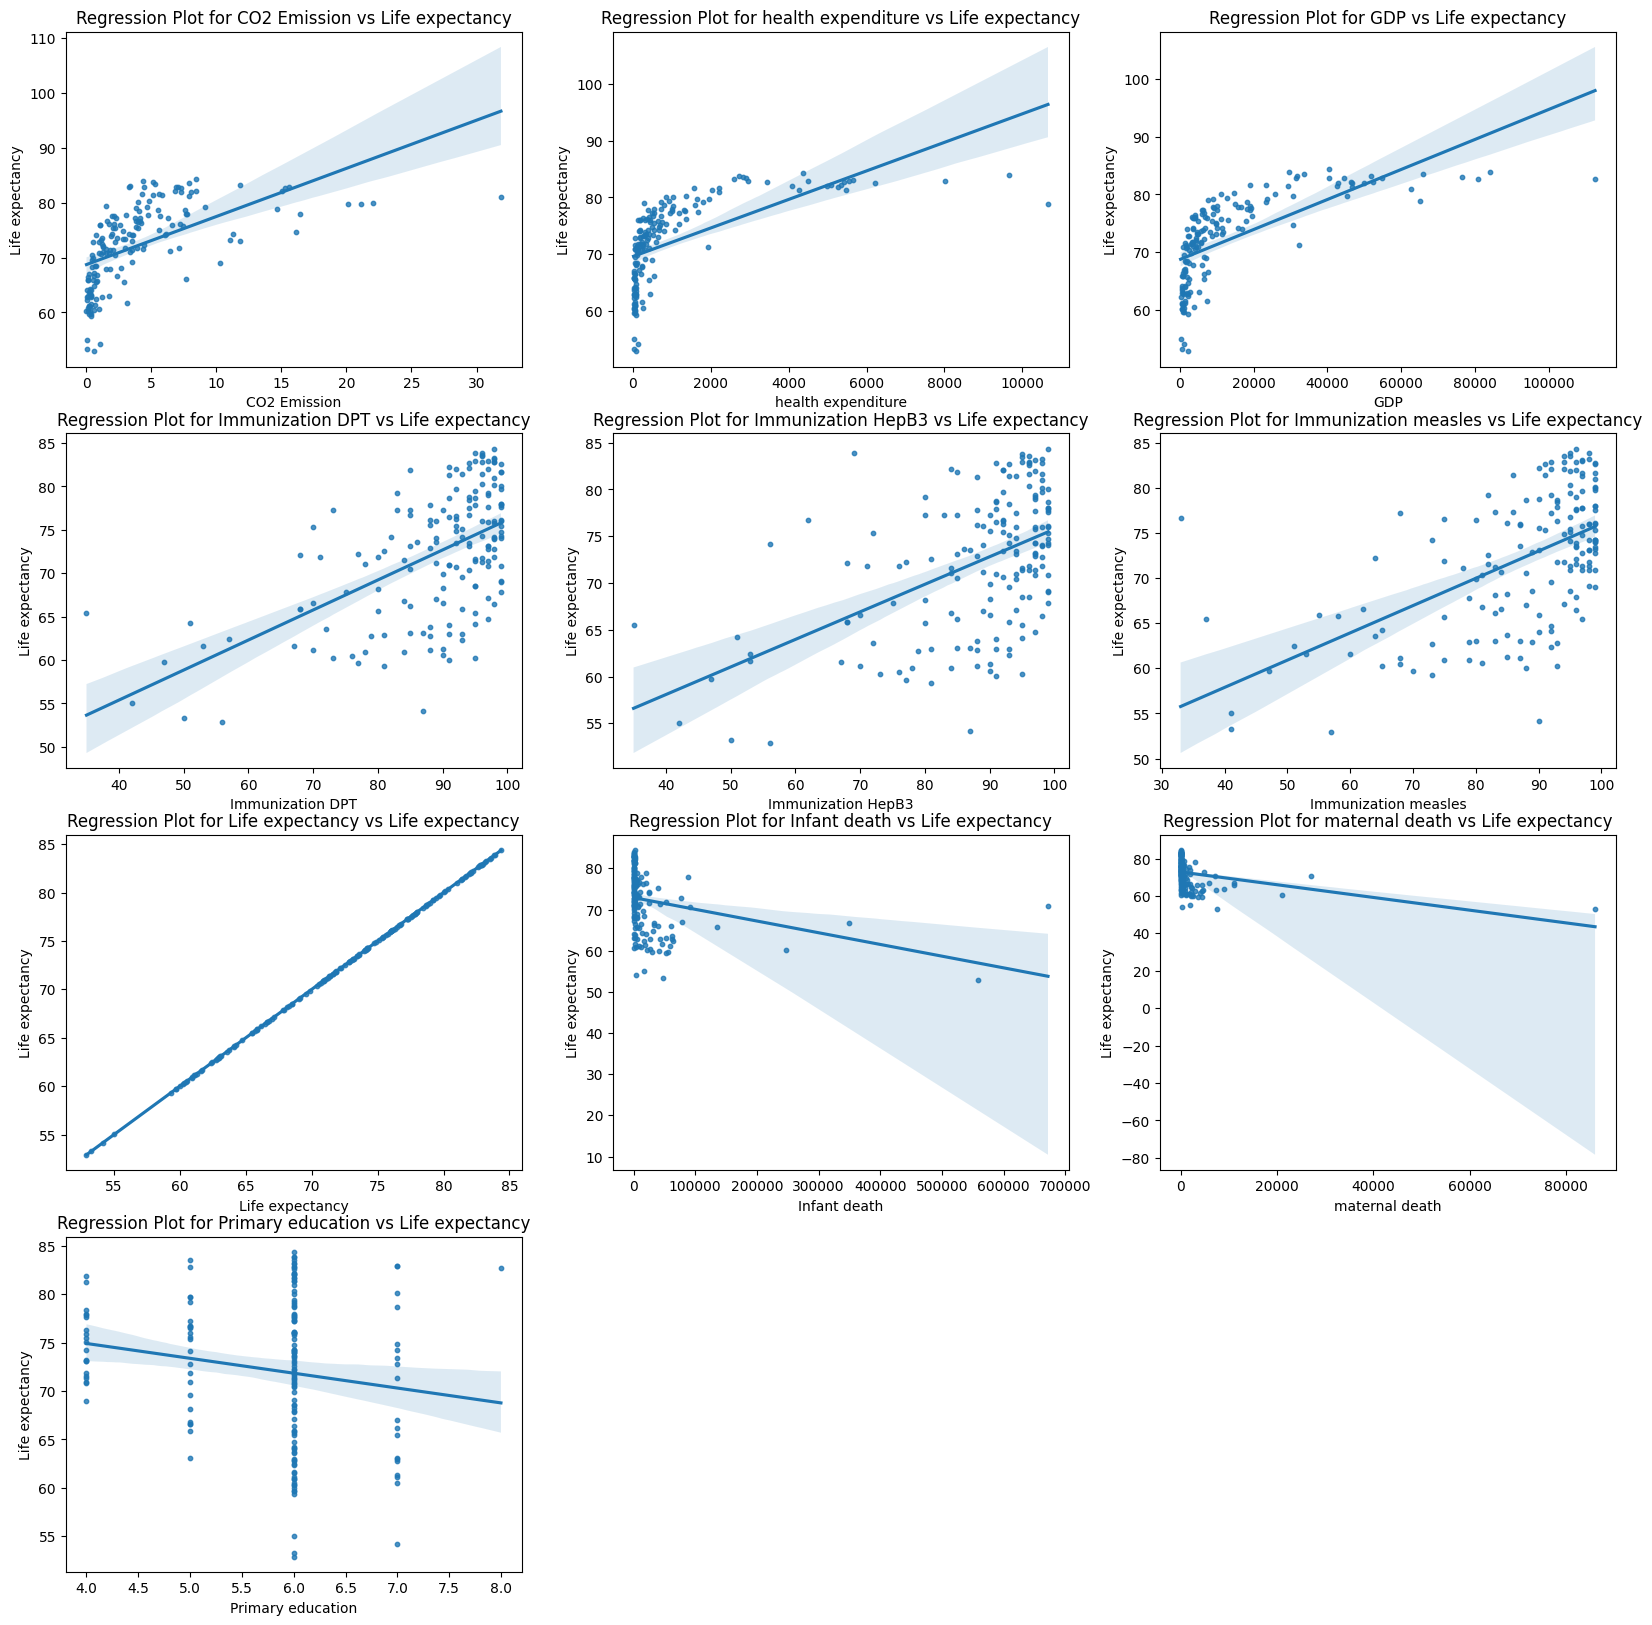

In [59]:
plt.figure(figsize=(20,20),dpi=100)

for index, feature_name in enumerate(cols):
    plt.subplot(4,3,index+1)
    sns.regplot(x=cols[feature_name], y=data['Life expectancy'], scatter_kws={'s': 10})  # 's' adalah ukuran marker pada scatter plot
    plt.title(f'Regression Plot for {feature_name} vs Life expectancy')
    plt.xlabel(feature_name)
    plt.ylabel("Life expectancy")

We extracted following results from the regression plot:

1. Most of the African Countries has lowest life expectancy.
2. Countries having high GDP also has high life expectancy.
3. Most of the european countries has high GDP as well as high life expectancy.
4. Most of the asian countries have high population and life expectancy between 60 to 70.
5. Overall life expectancy and Immunization has a linear relationship.
Interesting...

In [60]:
import plotly.express as px

# Urutkan DataFrame berdasarkan 'Life expectancy'
data_sorted = data.sort_values('Life expectancy')

# Buat plot dengan ukuran yang disesuaikan dan warna biru
fig = px.bar(data_sorted, x='Life expectancy', y='country', title='Life Expectancy by Country', height=3500, color='Life expectancy', color_continuous_scale=px.colors.sequential.Teal)
fig.show()


# <a id='toc6_'></a>[<b>IV <span style='color:#FF8551'>|</span> Multivariate Linear Regression</b>](#toc0_)

In [61]:
y = data["Life expectancy"].values
x = data.drop(["country"], axis=1)
x = x.drop(["Life expectancy"], axis = 1)

In [62]:
x.shape

(168, 9)

In [63]:
y.shape

(168,)

In [64]:
import statsmodels.api as sm 

X = sm.add_constant(x)
est = sm.OLS(y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     33.45
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.47e-32
Time:                        12:32:36   Log-Likelihood:                -485.27
No. Observations:                 168   AIC:                             990.5
Df Residuals:                     158   BIC:                             1022.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   59.5259      3.888     15.310      0.000      51.846      67.205
CO2 Emission             0.1863      0.105      1.767      0.079      -0.022       0.395
health expenditure       0.0006      0.001      1.146      0.254      -0.000       0.002
GDP                      0.0001   5.48e-05      2.382      0.018    2.23e-05       0.000
Immunization DPT         0.1696      0.108      1.569      0.119      -0.044       0.383
Immunization HepB3      -0.0796      0.110     -0.723      0.471      -0.297       0.138
Immunization measles     0.1109      0.057      1.958      0.052      -0.001       0.223
Infant death          4.539e-07   8.18e-06      0.056      0.956   -1.57e-05    1.66e-05
maternal death          -0.0002   8.65e-05     -1.764      0.080      -0.000    1.83e-05
Primary education       -1.3736      0.438     -3.138      0.002      -2.238      -0.509
==============================================================================
Omnibus:                        3.439   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                3.394
Skew:                          -0.303   Prob(JB):                        0.183
Kurtosis:                       2.657   Cond. No.                     8.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
population = pd.read_excel("population.xlsx")
data = pd.merge(data, population, on='country')
data

,country,CO2 Emission,health expenditure,GDP,Immunization DPT,Immunization HepB3,Immunization measles,Life expectancy,Infant death,maternal death,Primary education,population
0,Afghanistan,0.297564,74.234104,500.522981,72.0,72.0,64.0,63.565,62760.0,8900.0,6.0,38972230
1,Algeria,3.994402,250.560776,4021.983608,91.0,91.0,80.0,76.474,20101.0,760.0,5.0,43451666
2,Angola,0.753638,69.379341,2142.238757,57.0,53.0,51.0,62.448,63492.0,2900.0,6.0,33428486
3,Antigua and Barbuda,5.525582,801.543823,18187.779712,95.0,99.0,93.0,78.691,6.0,0.0,7.0,92664
4,Argentina,3.742030,958.523499,9963.674231,83.0,83.0,86.0,77.284,5086.0,220.0,6.0,45376763
...,...,...,...,...,...,...,...,...,...,...,...,...
163,Uzbekistan,3.504663,98.587418,1795.201768,96.0,96.0,98.0,71.344,10886.0,240.0,4.0,34232050
164,Vanuatu,0.548285,101.974411,3076.589886,90.0,90.0,80.0,69.877,192.0,8.0,6.0,311685
165,Viet Nam,3.567848,173.650452,3491.091279,89.0,89.0,95.0,74.093,25197.0,2000.0,5.0,96648685
166,Zambia,0.414336,67.457771,1268.120941,88.0,88.0,93.0,62.793,27246.0,840.0,7.0,18927715


In [66]:
y = data["Life expectancy"].values
x = data.drop(["country"], axis=1)
x = x.drop(["Life expectancy"], axis = 1)

In [67]:
x.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            158, 159, 160, 161, 162, 163, 164, 165, 166, 167],
           dtype='int64', length=168)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 24)
lr.fit(x_train, y_train)

print('The r2 score : ', lr.score(x_train, y_train))

The r2 score :  0.7104321432870406


In [72]:


result = permutation_importance(lr, x_test, y_test, n_repeats=10, random_state=42)

# Get importances and feature names
imp = result.importances_mean
features = x_test.columns  # Assuming x_test is a pandas DataFrame

# Sort features based on importances
sorted_idx = np.argsort(imp)

# Plot permutation feature importance
fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(range(len(sorted_idx)), imp[sorted_idx], align="center", color='grey', alpha=0.8, edgecolor='k')
ax.set_yticks(range(len(sorted_idx)))
ax.set_yticklabels(features[sorted_idx])
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
fig.tight_layout()

plt.show()

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
coefficients = lr.coef_
intercept = lr.intercept_

print("b0: ", coefficients)
print("b1,b2,..., bn:", intercept)

b0:  [ 1.95701798e-01  1.30363176e-04  2.46932290e-04 -2.16857452e-01
  2.38626195e-01  1.25552557e-01 -1.05854085e-05 -9.38907677e-05
 -1.22036529e+00  5.61231860e-09]
b1,b2,..., bn: 62.60737804236226


In [ ]:
coef_round = [round(coef, 4) for coef in coefficients]

ok = pd.DataFrame({'Kolom': x.columns, 'Koefisien': coef_round})
ok

,Kolom,Koefisien
0,CO2 Emission,0.1957
1,health expenditure,0.0001
2,GDP,0.0002
3,Immunization DPT,-0.2169
4,Immunization HepB3,0.2386
5,Immunization measles,0.1256
6,Infant death,-0.0000
7,maternal death,-0.0001
8,Primary education,-1.2204
9,population,0.0000


In [ ]:
# Menampilkan persamaan
equation = "y = {:.4f}".format(intercept)

for i, coef in enumerate(coefficients):
    equation += " + {:.8f} * X{}".format(coef, i+1)

print("Persamaan Multivariate Linear Regression:")
print(equation)

Persamaan Multivariate Linear Regression:
y = 62.6074 + 0.19570180 * X1 + 0.00013036 * X2 + 0.00024693 * X3 + -0.21685745 * X4 + 0.23862620 * X5 + 0.12555256 * X6 + -0.00001059 * X7 + -0.00009389 * X8 + -1.22036529 * X9 + 0.00000001 * X10


In [ ]:
import statsmodels.api as sm 

X_stats = sm.add_constant(x_train) 
est = sm.OLS(y_train, X_stats).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     26.01
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.08e-24
Time:                        12:16:53   Log-Likelihood:                -328.40
No. Observations:                 117   AIC:                             678.8
Df Residuals:                     106   BIC:                             709.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   62.6074      4.672     13.401      0.000      53.345      71.870
CO2 Emission             0.1957      0.135      1.446      0.151      -0.073       0.464
health expenditure       0.0001      0.001      0.144      0.886      -0.002       0.002
GDP                      0.0002   9.75e-05      2.532      0.013    5.36e-05       0.000
Immunization DPT        -0.2169      0.177     -1.223      0.224      -0.568       0.135
Immunization HepB3       0.2386      0.168      1.417      0.159      -0.095       0.573
Immunization measles     0.1256      0.071      1.776      0.079      -0.015       0.266
Infant death         -1.059e-05   1.07e-05     -0.986      0.326   -3.19e-05    1.07e-05
maternal death       -9.389e-05   9.14e-05     -1.028      0.306      -0.000    8.72e-05
Primary education       -1.2204      0.483     -2.528      0.013      -2.178      -0.263
population            5.612e-09   3.14e-09      1.786      0.077   -6.19e-10    1.18e-08
==============================================================================
Omnibus:                        1.488   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                1.279
Skew:                          -0.256   Prob(JB):                        0.528
Kurtosis:                       3.005   Cond. No.                     2.29e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Note :</b>

- Pvalue menyatakan adanya perbedaan dalam sebuah uji statistika. Biasanya batas ambang nilai p-value adalah 0.05, artinya jika nilai p-value di bawah itu maka akan semakin baik, begitu  juga sebaliknya. Aturannya adalah: Nilai di bawah 0,05 berati terdapat hubungan/perbedaan/H0 ditolak dan HA diterima. Sedangkan Nilai di atas 0,05 artinya tidak terdapat hubungan/perbedaan/H0 diterima dan HA ditolak.

- Pada kasus di atas terlihat bahwa nilai p-value terkecil adalah variabel GDP dan primary education, artiya variabel ini  memiliki keterkaitan sangat tinggi dengan variabel dependennya. Sedangkan variabel health expenditure merupakan variabel dengan nilai p-value tertinggi, artinya variabel ini memiliki keterkaitan sangat rendah dengan variabel dependendennya.

- Nilai koefisien deterministik (R2) sebesar 0.710 atau 71%, artinya variabilitas life expectacy dapat dijelaskan oleh variabel independen sebesar 71%.
</div>

ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 51.

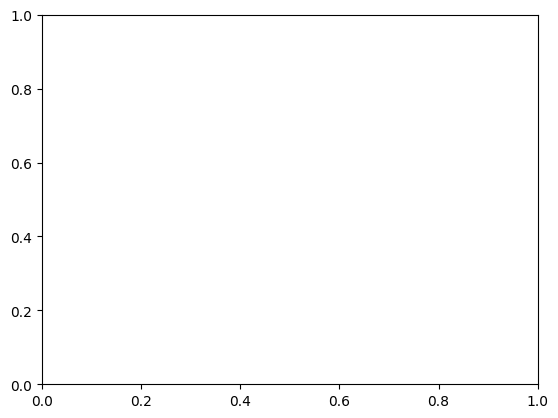

In [ ]:
y_pred = lr.predict(x_test)

plt.scatter(y_test, y_pred, c=['blue', 'red'])  # Anda bisa mengganti warna sesuai keinginan
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()

In [ ]:
fig = px.scatter(data, x="health expenditure", y="Life expectancy",
                 size="population",
                 hover_name="country", log_x=True, size_max=50)
fig.show()

In [ ]:
fig = px.scatter(data, x="GDP", y="Life expectancy",
                 size="population",
                 hover_name="country", log_x=True, size_max=50)
fig.show()